In [29]:
# HOMEWORK 4: DECISION TREES

# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [30]:
# DATA EXPLORATION

# Import data
df = pd.read_csv('Loans_Dataset.csv')

# First 5 rows
df.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [31]:
# Last 5 rows
df.tail()

,initial_payment,last_payment,credit_score,house_number,sum,result
999,168,14798,834,4937,20737,No
1000,234,14567,756,4766,20678,yes
1001,450,13897,867,7896,210456,yes
1002,347,14999,687,9876,246789,yes
1003,467,13555,666,7899,21786,yes


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1004 non-null   int64 
 1   last_payment     1004 non-null   int64 
 2   credit_score     1004 non-null   int64 
 3   house_number     1004 non-null   int64 
 4   sum              1004 non-null   int64 
 5   result           1004 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.2+ KB


In [33]:
# Describe data
df.describe()

,initial_payment,last_payment,credit_score,house_number,sum
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,294.662351,12473.009960,528.902390,4041.282869,17744.012948
std,115.844218,1442.134231,259.681745,618.431417,9594.659715
min,100.000000,10005.000000,100.000000,3003.000000,13515.000000
25%,195.750000,11213.500000,302.750000,3546.500000,16081.250000
50%,290.000000,12467.000000,518.000000,4046.000000,17383.000000
75%,398.000000,13690.000000,755.000000,4508.750000,18608.250000
max,500.000000,14999.000000,997.000000,9876.000000,246789.000000


C:\Users\ponch\AppData\Local\Temp\ipykernel_22232\3242538703.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['initial_payment'])


<Axes: xlabel='initial_payment', ylabel='Density'>

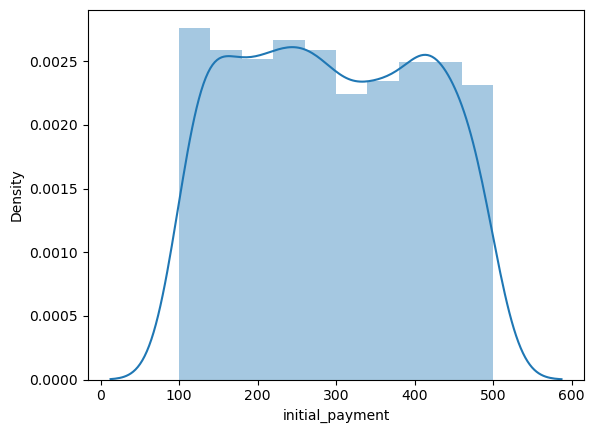

In [34]:
# Distribution
sns.distplot(df['initial_payment'])

C:\Users\ponch\AppData\Local\Temp\ipykernel_22232\4037448553.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['last_payment'])


<Axes: xlabel='last_payment', ylabel='Density'>

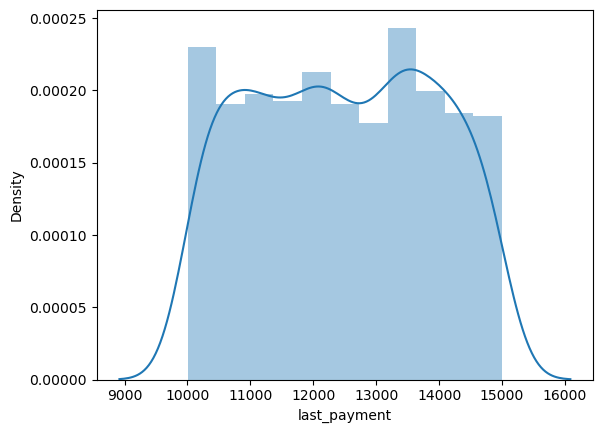

In [35]:
sns.distplot(df['last_payment'])

C:\Users\ponch\AppData\Local\Temp\ipykernel_22232\455147632.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['credit_score'])


<Axes: xlabel='credit_score', ylabel='Density'>

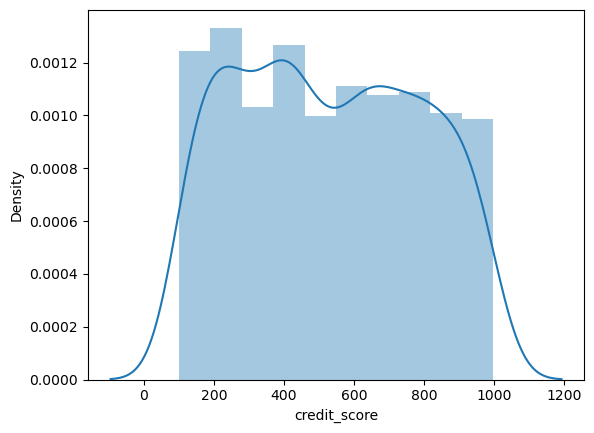

In [36]:
sns.distplot(df['credit_score'])

In [37]:
# DATA PREPROCESSING

# Get required data
df.drop(columns = ['house_number'], inplace=True)
df.head()

,initial_payment,last_payment,credit_score,sum,result
0,201,10018,250,13515,yes
1,205,10016,395,13660,yes
2,257,10129,109,13746,yes
3,246,10064,324,13771,yes
4,117,10115,496,13822,yes


In [42]:
# Split into independant and dependant variable
X = df.drop('result', axis=1)
y = df['result']

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [43]:
# MODELING

# Create the train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Use model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Prediction
y_pred = classifier.predict(X_test)

In [44]:
# EVALUATION

# Accuracy
accuracy_score(y_test, y_pred)

0.9950248756218906

In [45]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

          No       0.99      1.00      1.00       113
         yes       1.00      0.99      0.99        88

    accuracy                           1.00       201
   macro avg       1.00      0.99      0.99       201
weighted avg       1.00      1.00      1.00       201



<Axes: >

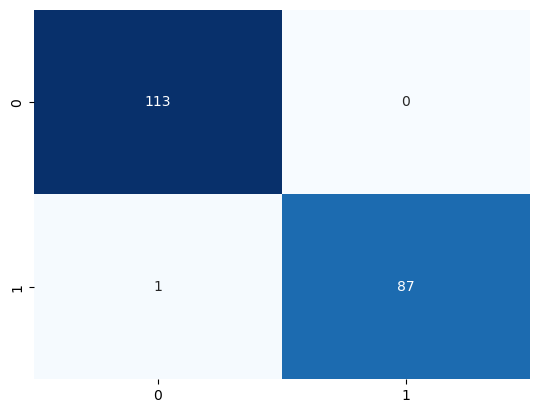

In [48]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [49]:
# We can see an almost perfect model with the evaluation metrics and confusion matrix